## Drive and Dependecies


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/cicddos2019/03-11

/content/drive/MyDrive/cicddos2019/03-11


In [ ]:
%ls

7_classes/                     clean_3_without_timestamp.csv    NetBIOS.csv
binary_balanced_dataset.csv    complete_dataset.csv             Portmap.csv
binary_dataset.csv             LDAP.csv                         Syn.csv
clean_1.csv                    MSSQL.csv                        UDP.csv
clean_2_wihtout_timestamp.csv  multiclass_balanced_dataset.csv  UDPLag.csv
clean_2_with_timestamp.csv     multiclass_dataset.csv


In [ ]:
import pandas as pd
from google.colab import files
pd.options.display.max_rows = 99999
pd.set_option('max_colwidth', 400)
#df=pd.read_csv('./clean_1.csv')

## Feature Engineering

In [ ]:
import pandas as pd
df = pd.read_csv("./multiclass_balanced_dataset.csv")
#df.info()
#df=df.drop('Unnamed: 0.1',axis=1)
x=df.drop('Label',axis='columns')
y=df.Label
print("x\n",x.info())
y = pd.DataFrame(y)
print('y\n',y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065464 entries, 0 to 3065463
Data columns (total 38 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Unnamed: 0                   int64  
 1    Source IP                   int64  
 2    Source Port                 int64  
 3    Destination IP              int64  
 4    Destination Port            int64  
 5    Protocol                    int64  
 6   Total Length of Fwd Packets  float64
 7    Fwd Packet Length Max       float64
 8    Fwd Packet Length Min       float64
 9    Fwd Packet Length Mean      float64
 10  Bwd Packet Length Max        float64
 11   Bwd Packet Length Min       float64
 12   Bwd Packet Length Mean      float64
 13   Bwd Packet Length Std       float64
 14  Flow Bytes/s                 float64
 15   Flow Packets/s              float64
 16   Flow IAT Mean               float64
 17   Flow IAT Std                float64
 18   Fwd IAT Mean                float64
 19  

In [ ]:
df.describe()

,Unnamed: 0,Source IP,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,...,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06
mean,1.532732e+06,2.915217e+09,2.806105e+04,3.029133e+09,2.992579e+04,1.455508e+01,1.008821e+03,4.251983e+02,4.012840e+02,4.067165e+02,...,2.830599e-02,6.043197e+02,4.067165e+02,1.330287e+01,1.008769e+03,1.494942e+03,3.431803e+02,2.441644e+05,8.549440e-01,3.500000e+00
std,8.849234e+05,2.506067e+08,2.505307e+04,6.978614e+08,2.039600e+04,4.593248e+00,1.611198e+03,4.502632e+02,4.429779e+02,4.403274e+02,...,1.658456e-01,6.602392e+02,4.403274e+02,8.528337e+01,1.611186e+03,4.497965e+03,3.315636e+03,1.417298e+06,3.521574e-01,2.291288e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,6.724045e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.663658e+05,2.886730e+09,7.940000e+02,3.232248e+09,1.144100e+04,1.700000e+01,4.220000e+02,2.110000e+02,4.300808e+01,1.055833e+02,...,0.000000e+00,2.056700e+02,1.055833e+02,0.000000e+00,4.220000e+02,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,1.750000e+00
50%,1.532732e+06,2.886730e+09,3.366300e+04,3.232248e+09,2.995200e+04,1.700000e+01,7.340000e+02,3.660000e+02,2.470000e+02,2.470000e+02,...,0.000000e+00,3.705000e+02,2.470000e+02,0.000000e+00,7.340000e+02,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,3.500000e+00
75%,2.299097e+06,2.886730e+09,5.301300e+04,3.232248e+09,4.783900e+04,1.700000e+01,1.128000e+03,4.420000e+02,4.330000e+02,4.360000e+02,...,0.000000e+00,6.480000e+02,4.360000e+02,0.000000e+00,1.128000e+03,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,5.250000e+00
max,3.065463e+06,3.715790e+09,6.553200e+04,4.294967e+09,6.553500e+04,1.700000e+01,1.509340e+05,3.617000e+03,2.131000e+03,2.131000e+03,...,1.000000e+00,2.208000e+03,2.131000e+03,1.843202e+03,1.509340e+05,6.553500e+04,6.553500e+04,6.188006e+07,1.000000e+00,7.000000e+00


In [ ]:
#normalizating the data
#df.iloc[:,df.columns != ' Flow Packets/s' or df.columns != 'Flow Bytes/s']
normalized_df=(df-df.mean())/df.std()
normalized_df=normalized_df.drop(' Flow Packets/s',axis=1)
normalized_df=normalized_df.drop('Flow Bytes/s',axis=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(100,200))
cor = normalized_df.corr()
sn.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#df=df.drop('Unnamed: 0.1',axis=1)
normalized_df.head()

,Unnamed: 0,Source IP,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
0,-1.732050,-0.113675,-1.085338,0.291053,-1.324661,0.532286,-0.364214,-0.475718,-0.429556,-0.444479,...,-0.170677,-0.435933,-0.444479,-0.155984,-0.364184,-0.332582,-0.103805,-0.172275,0.411907,-1.091089
1,-1.732049,-0.113675,-1.085298,0.291053,1.170338,0.532286,-0.297183,-0.355788,-0.307654,-0.321843,...,-0.170677,-0.313250,-0.321843,-0.155984,-0.297153,-0.332582,-0.103805,-0.172275,0.411907,-1.091089
2,-1.732048,-0.113675,-1.094200,0.291053,0.526290,0.532286,-0.341870,-0.435742,-0.388922,-0.403601,...,-0.170677,-0.395038,-0.403601,-0.155984,-0.341841,-0.332582,-0.103805,-0.172275,0.411907,-1.091089
3,-1.732047,-0.113675,-1.085259,0.291053,1.195441,0.532286,-0.341870,-0.435742,-0.388922,-0.403601,...,-0.170677,-0.395038,-0.403601,-0.155984,-0.341841,-0.332582,-0.103805,-0.172275,0.411907,-1.091089
4,-1.732045,-0.113675,-1.085219,0.291053,0.525947,0.532286,-0.341870,-0.435742,-0.388922,-0.403601,...,-0.170677,-0.395038,-0.403601,-0.155984,-0.341841,-0.332582,-0.103805,-0.172275,0.411907,-1.091089


In [ ]:
normalized_df=normalized_df.drop('Unnamed: 0', axis=1)
#normalized_df=normalized_df.drop('Unnamed: 0.1.1', axis=1)

In [ ]:
y=pd.DataFrame(y)

In [ ]:
normalized_df.describe()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,...,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06
mean,6.972973e-16,1.414473e-16,4.606772e-16,3.298830e-17,3.707892e-16,3.745535e-16,7.860171e-16,7.898463e-16,-1.090338e-16,-2.026768e-17,...,-4.280575e-18,9.756489e-17,-1.090338e-16,-1.040643e-16,7.624951e-17,1.066232e-16,7.268922e-18,-2.669475e-16,-2.017497e-16,-3.349638e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.163264e+01,-1.120065e+00,-4.244242e+00,-1.467238e+00,-3.168799e+00,-6.261307e-01,-9.443330e-01,-9.058781e-01,-9.236684e-01,-1.463328e-01,...,-1.706767e-01,-9.153042e-01,-9.236684e-01,-1.559844e-01,-6.261033e-01,-3.325818e-01,-1.038052e-01,-1.722746e-01,-2.427733e+00,-1.527525e+00
25%,-1.136748e-01,-1.088372e+00,2.910534e-01,-9.062947e-01,5.322861e-01,-3.642139e-01,-4.757181e-01,-8.087896e-01,-6.838847e-01,-1.463328e-01,...,-1.706767e-01,-6.037959e-01,-6.838847e-01,-1.559844e-01,-3.641845e-01,-3.325818e-01,-1.038052e-01,-1.722746e-01,4.119068e-01,-7.637625e-01
50%,-1.136748e-01,2.236032e-01,2.910534e-01,1.285199e-03,5.322861e-01,-1.705691e-01,-1.314750e-01,-3.482882e-01,-3.627221e-01,-1.463328e-01,...,-1.706767e-01,-3.541440e-01,-3.627221e-01,-1.559844e-01,-1.705383e-01,-3.325818e-01,-1.038052e-01,-1.722746e-01,4.119068e-01,0.000000e+00
75%,-1.136748e-01,9.959637e-01,2.910534e-01,8.782709e-01,5.322861e-01,7.396936e-02,3.731518e-02,7.159729e-02,6.650402e-02,-1.463328e-01,...,-1.706767e-01,6.615824e-02,6.650402e-02,-1.559844e-01,7.400200e-02,-3.325818e-01,-1.038052e-01,-1.722746e-01,4.119068e-01,7.637625e-01
max,3.194536e+00,1.495663e+00,1.813876e+00,1.745892e+00,5.322861e-01,9.305198e+01,7.088747e+00,3.904746e+00,3.915913e+00,1.344009e+01,...,5.859027e+00,2.428938e+00,3.915913e+00,2.145669e+01,9.305270e+01,1.423756e+01,1.966194e+01,4.348830e+01,4.119068e-01,1.527525e+00


In [ ]:
normalized_x=normalized_df.iloc[:,normalized_df.columns != 'Label']

In [ ]:
normalized_x.describe()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,...,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound
count,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,...,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06,3.065464e+06
mean,6.972973e-16,1.414473e-16,4.606772e-16,3.298830e-17,3.707892e-16,3.745535e-16,7.860171e-16,7.898463e-16,-1.090338e-16,-2.026768e-17,...,-1.481599e-17,-4.280575e-18,9.756489e-17,-1.090338e-16,-1.040643e-16,7.624951e-17,1.066232e-16,7.268922e-18,-2.669475e-16,-2.017497e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.163264e+01,-1.120065e+00,-4.244242e+00,-1.467238e+00,-3.168799e+00,-6.261307e-01,-9.443330e-01,-9.058781e-01,-9.236684e-01,-1.463328e-01,...,-2.505509e-01,-1.706767e-01,-9.153042e-01,-9.236684e-01,-1.559844e-01,-6.261033e-01,-3.325818e-01,-1.038052e-01,-1.722746e-01,-2.427733e+00
25%,-1.136748e-01,-1.088372e+00,2.910534e-01,-9.062947e-01,5.322861e-01,-3.642139e-01,-4.757181e-01,-8.087896e-01,-6.838847e-01,-1.463328e-01,...,-2.505509e-01,-1.706767e-01,-6.037959e-01,-6.838847e-01,-1.559844e-01,-3.641845e-01,-3.325818e-01,-1.038052e-01,-1.722746e-01,4.119068e-01
50%,-1.136748e-01,2.236032e-01,2.910534e-01,1.285199e-03,5.322861e-01,-1.705691e-01,-1.314750e-01,-3.482882e-01,-3.627221e-01,-1.463328e-01,...,-2.505509e-01,-1.706767e-01,-3.541440e-01,-3.627221e-01,-1.559844e-01,-1.705383e-01,-3.325818e-01,-1.038052e-01,-1.722746e-01,4.119068e-01
75%,-1.136748e-01,9.959637e-01,2.910534e-01,8.782709e-01,5.322861e-01,7.396936e-02,3.731518e-02,7.159729e-02,6.650402e-02,-1.463328e-01,...,-2.505509e-01,-1.706767e-01,6.615824e-02,6.650402e-02,-1.559844e-01,7.400200e-02,-3.325818e-01,-1.038052e-01,-1.722746e-01,4.119068e-01
max,3.194536e+00,1.495663e+00,1.813876e+00,1.745892e+00,5.322861e-01,9.305198e+01,7.088747e+00,3.904746e+00,3.915913e+00,1.344009e+01,...,3.991204e+00,5.859027e+00,2.428938e+00,3.915913e+00,2.145669e+01,9.305270e+01,1.423756e+01,1.966194e+01,4.348830e+01,4.119068e-01


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.25, random_state=0)
y_train = np.array(y_train)

In [ ]:
normalized_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065464 entries, 0 to 3065463
Data columns (total 35 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0    Source IP                   float64
 1    Source Port                 float64
 2    Destination IP              float64
 3    Destination Port            float64
 4    Protocol                    float64
 5   Total Length of Fwd Packets  float64
 6    Fwd Packet Length Max       float64
 7    Fwd Packet Length Min       float64
 8    Fwd Packet Length Mean      float64
 9   Bwd Packet Length Max        float64
 10   Bwd Packet Length Min       float64
 11   Bwd Packet Length Mean      float64
 12   Bwd Packet Length Std       float64
 13   Flow IAT Mean               float64
 14   Flow IAT Std                float64
 15   Fwd IAT Mean                float64
 16   Fwd IAT Std                 float64
 17  Fwd PSH Flags                float64
 18  Fwd Packets/s                float64
 19  

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065464 entries, 0 to 3065463
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   Label   int64
dtypes: int64(1)
memory usage: 23.4 MB


## Stochastic Gradient Descent

In [ ]:
#stochastic gradient descent
from  sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn import metrics
lr = SGDClassifier(loss="log", penalty="l2", max_iter=200)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log', max_iter=200)

In [ ]:
y_pred = lr.predict(X_test)
print("Stochastic Gradient Descent\nAccuracy =", metrics.accuracy_score(y_test, y_pred)*100)

Stochastic Gradient Descent
Accuracy = 75.79250645253052


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Stochastic Gradient Descent')

print('Accuracy = ', metrics.accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None,
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                 digits=2,
                                                                 output_dict=False))

print("F1 Score = ",f1_score(y_test, y_pred, average='macro'))

Stochastic Gradient Descent
Accuracy =  75.79250645253052
Confusion Matrix =
 [[94007   103     0     0    79   500     4  1112]
 [    3 26584     2     0 69120     0     9     5]
 [  138     2 95446   180    17    62    18    90]
 [   24     2   545 77163   867    16   368 16576]
 [   87 23124    66   115 72083   187    13   181]
 [   15     0     0    10     0 95834     2    15]
 [   14     0     0 34529     5    12 50412 10738]
 [ 4311    17     0  6559    37  2703 12936 69319]]
Recall = 0.7579250645253052
Classification Report =
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     95805
           1       0.53      0.28      0.37     95723
           2       0.99      0.99      0.99     95953
           3       0.65      0.81      0.72     95561
           4       0.51      0.75      0.61     95856
           5       0.96      1.00      0.98     95876
           6       0.79      0.53      0.63     95710
           7       0.71    

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Naive Bayes')

print('Accuracy = ', metrics.accuracy_score(y_test,y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None,
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, y_pred, average='macro'))

Naive Bayes
Accuracy =  76.27256428390612
Confusion Matrix =
 [[94932     0     0     0     0     0     0   873]
 [   47 94813     2   749    96     0     1    15]
 [  209     0 94130   356     0    19     0  1239]
 [   62     0   754 81658     0     0 12821   266]
 [  290 94298     0   948   115     1     4   200]
 [   15     0     0    15     0 95833     1    12]
 [   83     0     0  3469     0     1 91962   195]
 [ 8132    19     0 13163    20   111 43353 31084]]
Recall = 0.7627256428390612
Classification Report =
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     95805
           1       0.50      0.99      0.67     95723
           2       0.99      0.98      0.99     95953
           3       0.81      0.85      0.83     95561
           4       0.50      0.00      0.00     95856
           5       1.00      1.00      1.00     95876
           6       0.62      0.96      0.75     95710
           7       0.92      0.32      0.48

## KNN Classifier

In [ ]:
import pandas as pd
df = pd.read_csv("./multiclass_balanced_dataset.csv")
df = df.sample(frac=0.10)
#df.info()
#df=df.drop('Unnamed: 0.1',axis=1)
x=df.drop('Label',axis='columns')
y=df.Label
print("x\n",x.info())
y = pd.DataFrame(y)
print('y\n',y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306546 entries, 2058256 to 14259
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   306546 non-null  int64  
 1    Source IP                   306546 non-null  int64  
 2    Source Port                 306546 non-null  int64  
 3    Destination IP              306546 non-null  int64  
 4    Destination Port            306546 non-null  int64  
 5    Protocol                    306546 non-null  int64  
 6   Total Length of Fwd Packets  306546 non-null  float64
 7    Fwd Packet Length Max       306546 non-null  float64
 8    Fwd Packet Length Min       306546 non-null  float64
 9    Fwd Packet Length Mean      306546 non-null  float64
 10  Bwd Packet Length Max        306546 non-null  float64
 11   Bwd Packet Length Min       306546 non-null  float64
 12   Bwd Packet Length Mean      306546 non-null  float64

In [ ]:
#normalizating the data
#df.iloc[:,df.columns != ' Flow Packets/s' or df.columns != 'Flow Bytes/s']
normalized_df=(df-df.mean())/df.std()
normalized_df=normalized_df.drop(' Flow Packets/s',axis=1)
normalized_df=normalized_df.drop('Flow Bytes/s',axis=1)

In [ ]:
normalized_df=normalized_df.drop('Unnamed: 0', axis=1)
#normalized_df=normalized_df.drop('Unnamed: 0.1.1', axis=1)

In [ ]:
y=pd.DataFrame(y)

In [ ]:
normalized_x=normalized_df.iloc[:,normalized_df.columns != 'Label']

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(normalized_x, y, test_size=0.25, random_state=0)
y_train_10 = np.array(y_train_10)

In [ ]:
df1=pd.DataFrame(y_train_10)
df1.value_counts()

7    28934
4    28822
3    28810
1    28796
2    28722
6    28664
0    28584
5    28577
dtype: int64

In [ ]:
df1=pd.DataFrame(y_test_10)
df1.value_counts()

Label
0        9715
1        9667
2        9652
4        9604
7        9589
6        9552
3        9517
5        9341
dtype: int64

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train_10, y_train_10)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
y_pred = model.predict(X_test_10)


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('K Nearest Neighbour Classifier')

print('Accuracy = ', metrics.accuracy_score(y_test_10, y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test_10, y_pred, labels=None,
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test_10, y_pred, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test_10, y_pred,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test_10, y_pred, average='macro'))

K Nearest Neighbour Classifier
Accuracy =  86.98278899226223
Confusion Matrix =
 [[9713    0    0    0    0    1    0    1]
 [   0 6327    0    5 3334    0    0    1]
 [   1    0 9626    3    1    5    0   16]
 [   1    1   18 9120    3    1  274   99]
 [   1 5109    7   26 4438    0    0   23]
 [   1    0    0    0    0 9339    0    1]
 [   0    0    0  245    1    0 8823  483]
 [   0    1    3   87    1    3  219 9275]]
Recall = 0.8698278899226223
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9715
           1       0.55      0.65      0.60      9667
           2       1.00      1.00      1.00      9652
           3       0.96      0.96      0.96      9517
           4       0.57      0.46      0.51      9604
           5       1.00      1.00      1.00      9341
           6       0.95      0.92      0.94      9552
           7       0.94      0.97      0.95      9589

    accuracy                     



## Support Vector Machine

In [ ]:
import pandas as pd
df = pd.read_csv("./multiclass_balanced_dataset.csv")
df = df.sample(frac=0.10)
#df.info()
#df=df.drop('Unnamed: 0.1',axis=1)
x=df.drop('Label',axis='columns')
y=df.Label
y = pd.DataFrame(y)


In [ ]:
#normalizating the data
#df.iloc[:,df.columns != ' Flow Packets/s' or df.columns != 'Flow Bytes/s']
normalized_df=(df-df.mean())/df.std()
normalized_df=normalized_df.drop(' Flow Packets/s',axis=1)
normalized_df=normalized_df.drop('Flow Bytes/s',axis=1)

In [ ]:
normalized_df=normalized_df.drop('Unnamed: 0', axis=1)
#normalized_df=normalized_df.drop('Unnamed: 0.1.1', axis=1)

In [ ]:
y=pd.DataFrame(y)

In [ ]:
normalized_x=normalized_df.iloc[:,normalized_df.columns != 'Label']

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(normalized_x, y, test_size=0.25, random_state=0)
y_train_10 = np.array(y_train_10)

In [ ]:
df1=pd.DataFrame(y_train_10)
df1.value_counts()

6    29047
0    28860
4    28831
7    28764
2    28693
3    28678
1    28584
5    28452
dtype: int64

In [ ]:
df1=pd.DataFrame(y_test_10)
df1.value_counts()

Label
5        9728
2        9708
0        9606
6        9583
3        9529
7        9528
4        9479
1        9476
dtype: int64

In [ ]:

from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train_10, y_train_10)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
y_pred = model.predict(X_test_10)


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('SVM Linear kernel')

print('Accuracy = ', metrics.accuracy_score(y_test_10, y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test_10, y_pred, labels=None,
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test_10, y_pred, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test_10, y_pred,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test_10, y_pred, average='macro'))

SVM Linear kernel
Accuracy =  81.7907799104871
Confusion Matrix =
 [[9466    0    2    0    1    0    0  123]
 [   0 2595    0    3 7116    0    1    0]
 [   9    1 9606    1    0    6    1    6]
 [   0    4   13 8416    0    0  256  812]
 [   5 2397    7   24 7300    8    0    6]
 [   2    0    0    0    0 9582    0    5]
 [   0    0    0  333    0    1 7089 1951]
 [  55    9    0  522   19  230   26 8628]]
Recall = 0.817907799104871
Classification Report =
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      9592
           1       0.52      0.27      0.35      9715
           2       1.00      1.00      1.00      9630
           3       0.91      0.89      0.90      9501
           4       0.51      0.75      0.60      9747
           5       0.98      1.00      0.99      9589
           6       0.96      0.76      0.85      9374
           7       0.75      0.91      0.82      9489

    accuracy                           0.82     

In [ ]:

from sklearn import svm
model = svm.SVC(kernel='sigmoid')
model.fit(X_train_10, y_train_10)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
y_pred = model.predict(X_test_10)


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('SVM Sigmoid kernel')

print('Accuracy = ', metrics.accuracy_score(y_test_10, y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test_10, y_pred, labels=None,
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test_10, y_pred, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test_10, y_pred,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test_10, y_pred, average='macro'))

SVM Sigmoid kernel
Accuracy =  77.24989234964835
Confusion Matrix =
 [[8923   11   31    0    6  200    3  432]
 [   4 5824    0    3 3636    0    9    0]
 [  27    0 9420  242    1    2    0   16]
 [  20    0  632 7712    0    3  588  574]
 [  21 5875   17   21 3524    8   12    1]
 [1086    0    0    1    0 8636    0    5]
 [ 381    0    0  290    0    2 7041 1869]
 [ 742    4    0  345    2  237   76 8122]]
Recall = 0.7724989234964834
Classification Report =
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      9606
           1       0.50      0.61      0.55      9476
           2       0.93      0.97      0.95      9708
           3       0.90      0.81      0.85      9529
           4       0.49      0.37      0.42      9479
           5       0.95      0.89      0.92      9728
           6       0.91      0.73      0.81      9583
           7       0.74      0.85      0.79      9528

    accuracy                           0.77  

In [ ]:

from sklearn import svm
model = svm.SVC(kernel='rbf')
model.fit(X_train_10, y_train_10)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
y_pred = model.predict(X_test_10)


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('SVM RBF kernel')

print('Accuracy = ', metrics.accuracy_score(y_test_10, y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test_10, y_pred, labels=None,
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test_10, y_pred, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test_10, y_pred,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test_10, y_pred, average='macro'))

SVM RBF kernel
Accuracy =  84.89893915471639
Confusion Matrix =
 [[9606    0    0    0    0    0    0    0]
 [   1 2303    0    4 7168    0    0    0]
 [   4    0 9669   14    0    4    0   17]
 [   0    0   12 8730    0    0  343  444]
 [   1 1682    5   30 7733    0    1   27]
 [   2    0    0    2    0 9720    0    4]
 [   1    0    1  227    0    0 8019 1335]
 [   2    0    0  188    6   24   24 9284]]
Recall = 0.8489893915471639
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9606
           1       0.58      0.24      0.34      9476
           2       1.00      1.00      1.00      9708
           3       0.95      0.92      0.93      9529
           4       0.52      0.82      0.63      9479
           5       1.00      1.00      1.00      9728
           6       0.96      0.84      0.89      9583
           7       0.84      0.97      0.90      9528

    accuracy                           0.85     7

## K Means Classifier

In [ ]:
import pandas as pd
df = pd.read_csv("./multiclass_balanced_dataset.csv")
df = df.sample(frac=0.010)
#df.info()
#df=df.drop('Unnamed: 0.1',axis=1)
x=df.drop('Label',axis='columns')
y=df.Label
y = pd.DataFrame(y)

In [ ]:
#normalizating the data
#df.iloc[:,df.columns != ' Flow Packets/s' or df.columns != 'Flow Bytes/s']
normalized_df=(df-df.mean())/df.std()
normalized_df=normalized_df.drop(' Flow Packets/s',axis=1)
normalized_df=normalized_df.drop('Flow Bytes/s',axis=1)

In [ ]:
normalized_df=normalized_df.drop('Unnamed: 0', axis=1)
#normalized_df=normalized_df.drop('Unnamed: 0.1.1', axis=1)

In [ ]:
y=pd.DataFrame(y)

In [ ]:
normalized_x=normalized_df.iloc[:,normalized_df.columns != 'Label']

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(normalized_x, y, test_size=0.25, random_state=0)
y_train_10 = np.array(y_train_10)

In [ ]:
df1=pd.DataFrame(y_train_10)
df1.value_counts()

1    10100
0     9862
dtype: int64

In [ ]:
df1=pd.DataFrame(y_test_10)
df1.value_counts()

Label
1        3377
0        3278
dtype: int64

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_10)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_10, model.labels_, metric='euclidean'))

model = KMeans()
model.fit(X_train_10, y_train_10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

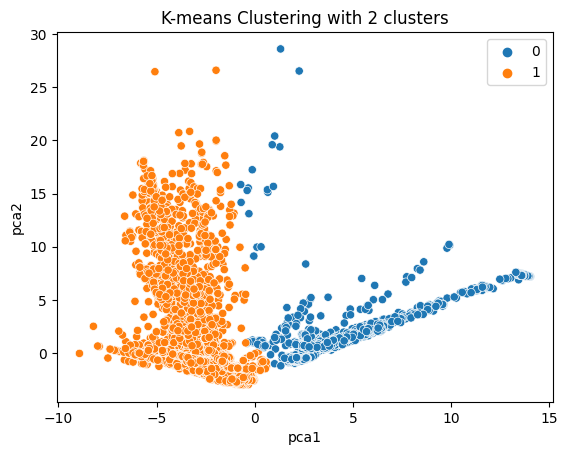

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X_train_10)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue = fits[0].labels_, data=results)
plt.title('K-means Clustering with 2 clusters')
plt.show()

#sns.scatterplot(data = X_train_10, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

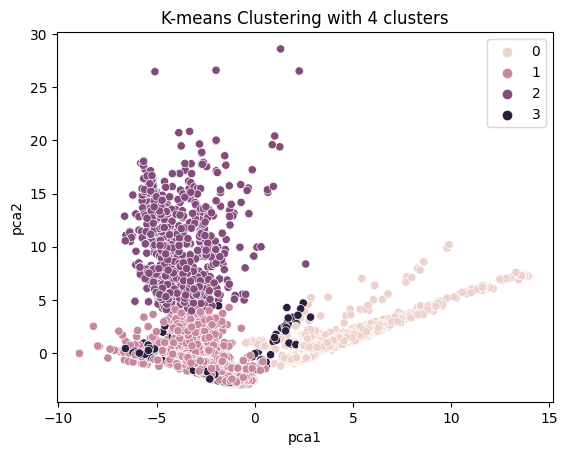

In [ ]:
sns.scatterplot(x="pca1", y="pca2", hue = fits[2].labels_, data=results)
plt.title('K-means Clustering with 4 clusters')
plt.show()

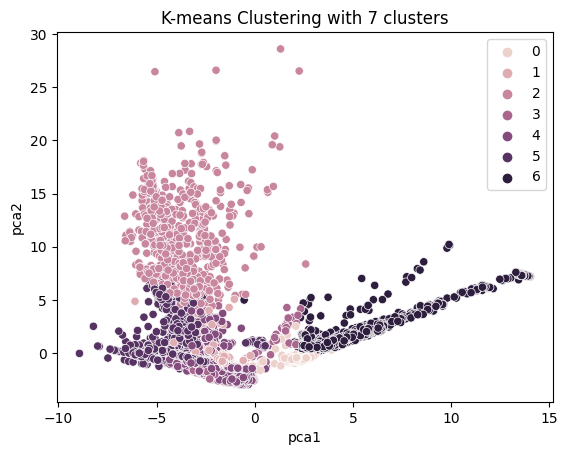

In [ ]:
sns.scatterplot(x="pca1", y="pca2", hue = fits[5].labels_, data=results)
plt.title('K-means Clustering with 7 clusters')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
model.fit(results,y_train_10)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [ ]:
pca_num_components = 2

reduced_data_test = PCA(n_components=pca_num_components).fit_transform(X_test_10)
results_test = pd.DataFrame(reduced_data_test,columns=['pca1','pca2'])


In [ ]:
y_pred = model.predict(results_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('K Means Classifier')

print('Accuracy = ', metrics.accuracy_score(y_test_10,y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test_10, y_pred, labels=None,
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test_10, y_pred, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test_10, y_pred,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test_10, y_pred, average='macro'))

K Means Classifier
Accuracy =  10.653643876784374
Confusion Matrix =
 [[  51 3227]
 [2719  658]]
Recall = 0.10653643876784373
Classification Report =
               precision    recall  f1-score   support

           0       0.02      0.02      0.02      3278
           1       0.17      0.19      0.18      3377

    accuracy                           0.11      6655
   macro avg       0.09      0.11      0.10      6655
weighted avg       0.10      0.11      0.10      6655

F1 Score =  0.09904118743797895
